<a href="https://colab.research.google.com/github/SolNam-UI/CTD/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

install 부

In [ ]:
!pip install quickdraw Pillow tensorflow scipy

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
%cd "/content/drive/MyDrive/CNNimals/storage"
%run 8409b3feec20f159d8a50b0a811d3bca/draw.py #Colab 환경에서 사용자가 그릴 수 있게 해주는 오픈소스

Mounted at /content/drive
/content/drive/MyDrive/CNNimals/storage


CNN 모델 학습 (최초 1회 실행)

In [ ]:
import numpy as np
import PIL.Image
import tensorflow as tf
from PIL import Image
from quickdraw import QuickDrawData, QuickDrawDataGroup
from keras import layers
from keras import models
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True, verbose=1)
checkpoint = ModelCheckpoint("best_model.keras", monitor='val_loss', save_best_only=True, verbose=1)

# 이미지 데이터 불러오기
trainList = QuickDrawData().drawing_names[:30]
trainImg, trainLabel = [], []

for i, label in enumerate(trainList):
    drawings = list(QuickDrawDataGroup(label).drawings)[:1000]
    for d in drawings:
        img = d.image.resize((28, 28)).convert("L")
        img_array = np.array(img) / 255.0
        trainImg.append(img_array)
        trainLabel.append(i)

trainImg = np.array(trainImg).reshape(-1, 28, 28, 1)
trainLabel = np.array(trainLabel)

X_train, X_val, y_train, y_val = train_test_split(trainImg, trainLabel, test_size=0.2, stratify=trainLabel)

# 모델 정의
model = Sequential([
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.4),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(30, activation="softmax")
])
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val), callbacks=[reduce_lr, early_stop, checkpoint])

loading aircraft carrier drawings
load complete
loading airplane drawings
load complete
loading alarm clock drawings
load complete
loading ambulance drawings
load complete
loading angel drawings
load complete
loading animal migration drawings
load complete
loading ant drawings
load complete
loading anvil drawings
load complete
loading apple drawings
load complete
loading arm drawings
load complete
loading asparagus drawings
load complete
loading axe drawings
load complete
loading backpack drawings
load complete
loading banana drawings
load complete
loading bandage drawings
load complete
loading barn drawings
load complete
loading baseball bat drawings
load complete
loading baseball drawings
load complete
loading basket drawings
load complete
loading basketball drawings
load complete
loading bat drawings
load complete
loading bathtub drawings
load complete
loading beach drawings
load complete
loading bear drawings
load complete
loading beard drawings
load complete
loading bed drawings
l

학습 정확도 및 손실 시각화

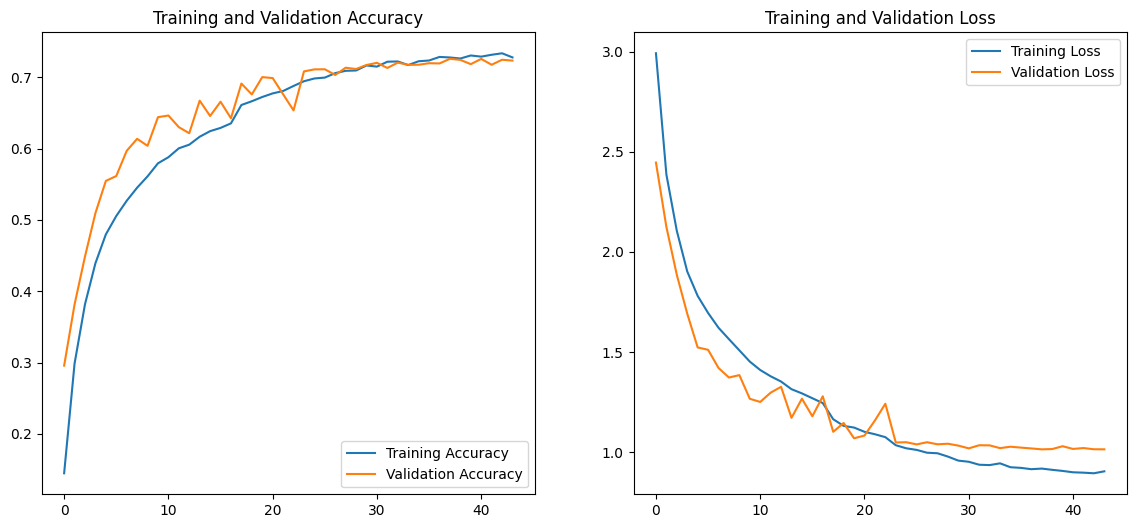

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

plot_history(history)

그림 그리고 예측 프로그램부

In [ ]:
import random
import time
import os
import ast
import PIL.Image
import matplotlib.pyplot as plt
from quickdraw import QuickDrawData
from tensorflow.keras.models import load_model

# 학습된 모델, 훈련데이터 리스트 불러오기
model = load_model("/content/drive/MyDrive/CNNimals/storage/best_model.keras")

trainList = QuickDrawData().drawing_names[:30]

# 이미지 전처리
def prepDrawing():
    img = PIL.Image.open(img_path).resize((28, 28)).convert("RGBA")
    background = Image.new("RGB", img.size, (255, 255, 255))
    background.paste(img, mask=img.split()[3])
    gray_img = background.convert("L")
    imgTemp = np.array(gray_img) / 255.0
    inData = imgTemp.reshape(1, 28, 28, 1)
    os.remove(img_path)

    print("그림을 분석 중입니다.")
    time.sleep(1)
    predict(inData)

def predict(inData):
    # 예측
    prediction = model.predict(inData)
    result = trainList[np.argmax(prediction)]
    print("목표 그림은" + goalImg + "이고 정답은"+ result + "입니다.")
    if (result == goalImg) :
        print("성공!")
    else:
        print("실패!")

# 이미지 리스트에서 그릴 이미지 할당
goalImg = random.choice(trainList)
print("목표 그림: ", goalImg)

drawingsName = "drawings.png"
img_path = "/content/drive/MyDrive/CNNimals/storage/drawings.png"
draw(filename=drawingsName , w=280, h=280, line_width=12)
prepDrawing()

목표 그림:  bench


<IPython.core.display.Javascript object>